In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/semester 5/ppw/data facebook/facebook_combined.txt', sep=' ', header=None)
df.head()

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Partisi komunitas: {'A': 1, 'B': 1, 'C': 1, 'D': 0, 'E': 0}
Modularity: 0.220


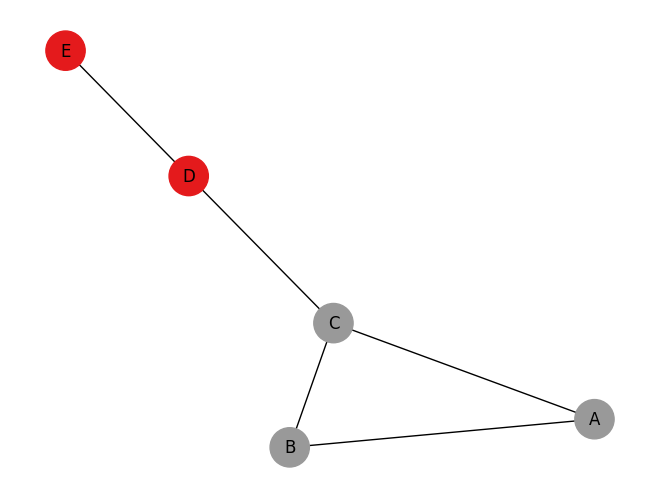

In [7]:
!pip install python-louvain
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Graph contoh kecil
G = nx.Graph()
G.add_edges_from([
    ('A','B'), ('A','C'),
    ('B','C'),
    ('C','D'), ('D','E')
])

# Louvain
partition = community_louvain.best_partition(G)
mod = community_louvain.modularity(partition, G)

print("Partisi komunitas:", partition)
print(f"Modularity: {mod:.3f}")

# Visualisasi
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_color=[partition[n] for n in G.nodes()],
    cmap=plt.cm.Set1,
    node_size=800
)
plt.show()

## Analisis Komunitas

Total Node   : 4039
Total Edges  : 88234

Graph berhasil dimuat!

Menjalankan Louvain Community Detection...
Jumlah komunitas ditemukan: 16
Modularity Score          : 0.8350



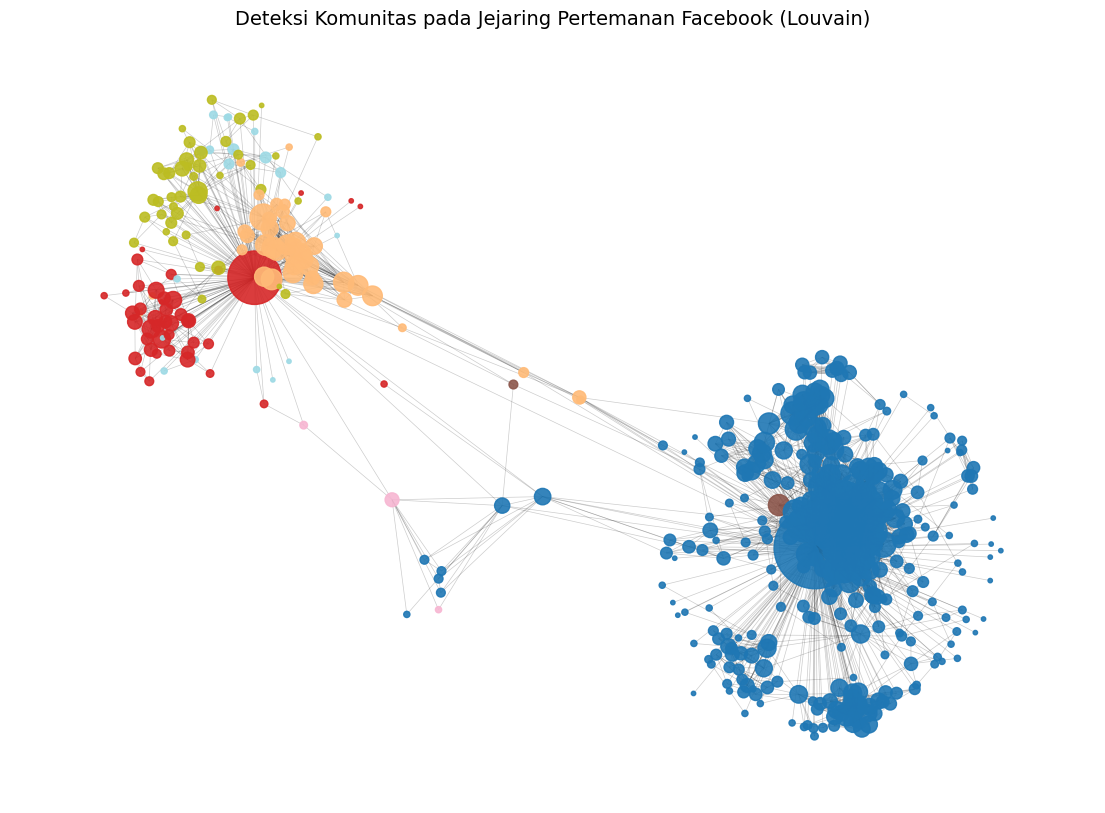

=== ANALISIS KOMUNITAS FACEBOOK ===

Top 10 komunitas berdasarkan jumlah anggota:
community
7      19
15     19
11     25
12     60
9      73
6     128
13    206
14    226
10    237
5     323
Name: count, dtype: int64
Urutan komunitas dari jumlah anggota terkecil ke terbesar:
community
7      19
15     19
11     25
12     60
9      73
6     128
13    206
14    226
10    237
5     323
0     350
3     423
1     432
2     435
4     535
8     548
Name: count, dtype: int64


In [8]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np

# Bangun graph
G = nx.from_pandas_edgelist(df, 0, 1)

print(f"Total Node   : {G.number_of_nodes()}")
print(f"Total Edges  : {G.number_of_edges()}")
print("\nGraph berhasil dimuat!\n")

# ======================================
# 2. DETEKSI KOMUNITAS (Louvain)
# ======================================
print("Menjalankan Louvain Community Detection...")

partition = community_louvain.best_partition(G)
modularity_value = community_louvain.modularity(partition, G)

print(f"Jumlah komunitas ditemukan: {len(set(partition.values()))}")
print(f"Modularity Score          : {modularity_value:.4f}\n")

# ======================================
#    Hanya ambil 500 node untuk menjaga performa visualisasi
# ======================================
sub_nodes = list(G.nodes())[:500]
H = G.subgraph(sub_nodes)

partition_sub = {n: partition[n] for n in H.nodes()}
node_degree = dict(H.degree())

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(H, k=0.12, seed=42)

nx.draw_networkx_nodes(
H, pos,
    node_size=[node_degree[n] * 10 for n in H.nodes()],
    node_color=list(partition_sub.values()),
    cmap="tab20",
    alpha=0.9
)

nx.draw_networkx_edges(
H, pos,
    alpha=0.2,
    width=0.5
)

plt.title("Deteksi Komunitas pada Jejaring Pertemanan Facebook (Louvain)", fontsize=14)
plt.axis("off")
plt.show()

# ======================================
# 4. ANALISIS KOMUNITAS
# ======================================
print("=== ANALISIS KOMUNITAS FACEBOOK ===\n")

community_df = pd.DataFrame.from_dict(partition, orient='index', columns=['community'])
community_sizes = community_df['community'].value_counts().sort_values(ascending=True)

print("Top 10 komunitas berdasarkan jumlah anggota:")
print(community_sizes.head(10))

print("Urutan komunitas dari jumlah anggota terkecil ke terbesar:")
print(community_sizes)

## Cek komunitas tiap node

In [9]:
import pandas as pd
import networkx as nx
from community import community_louvain

# ===============================
# 1. Bangun Graph & Komunitas
# ===============================
G = nx.from_pandas_edgelist(df, 0, 1)

partition = community_louvain.best_partition(G)   # komunitas setiap node

# ===============================
# 2. Hitung komunitas yang terhubung
# ===============================
result = []

for node in G.nodes():
    node_comm = partition[node]   # komunitas node itu sendiri

    # ambil semua tetangga node
    neighbors = list(G.neighbors(node))

    # komunitas dari tetangga-tetangga itu
    neighbor_comms = sorted(list({partition[n] for n in neighbors}))

    result.append({
        "node": node,
        "komunitas_node": node_comm,
        "komunitas_yang_terhubung": neighbor_comms
    })

# ===============================
# 3. Convert ke DataFrame
# ===============================
result_df = pd.DataFrame(result)

# tampilkan 15 baris pertama
print(result_df.head(15))

# ===============================
# 4. Simpan ke CSV
# ===============================
result_df.to_csv("komunitas_node_dan_keterhubungan.csv", index=False)

print("\nFile berhasil disimpan: komunitas_node_dan_keterhubungan.csv")

    node  komunitas_node komunitas_yang_terhubung
0      0               0          [0, 1, 2, 4, 7]
1      1               0                      [0]
2      2               0                      [0]
3      3               0                      [0]
4      4               0                      [0]
5      5               0                      [0]
6      6               0                      [0]
7      7               0                   [0, 4]
8      8               0                      [0]
9      9               0                      [0]
10    10               0                      [0]
11    11               0                      [0]
12    12               0                      [0]
13    13               0                      [0]
14    14               0                      [0]

File berhasil disimpan: komunitas_node_dan_keterhubungan.csv


In [10]:
result_df[result_df['node'] == 4000]

,node,komunitas_node,komunitas_yang_terhubung
4002,4000,12,[12]



Community 1 -> nodes: 432, edges: 6082


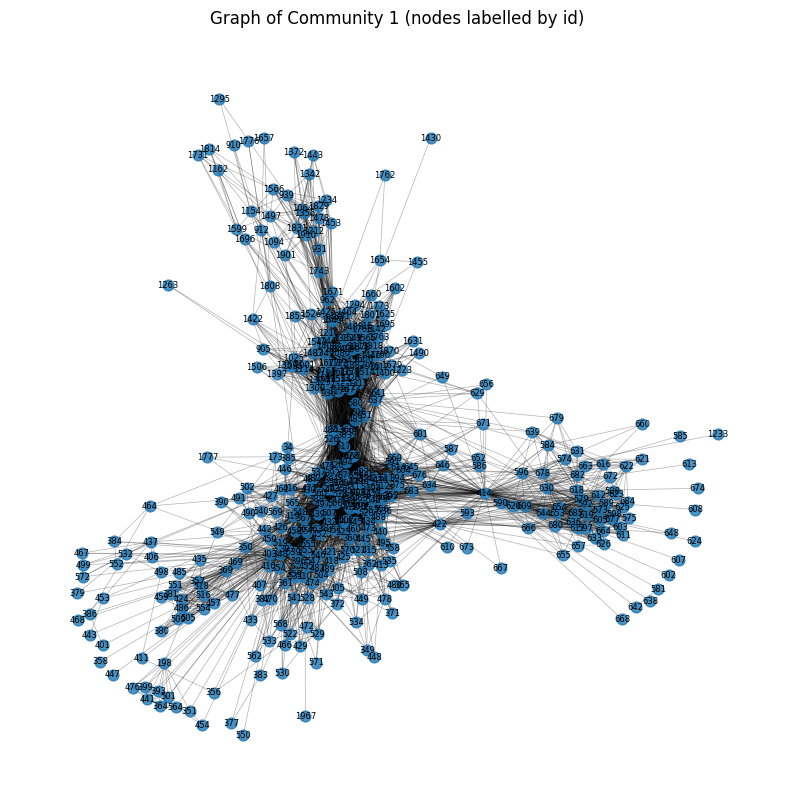

Saved figure: community_1_graph.png


<Figure size 640x480 with 0 Axes>

In [17]:
plot_comm = 1

# Group nodes by community from the 'partition' dictionary
members = {}
for node, comm_id in partition.items():
    if comm_id not in members:
        members[comm_id] = []
    members[comm_id].append(node)

if plot_comm not in members:
    print(f"\nCommunity {plot_comm} tidak ditemukan (max community id: {max(members.keys())})")
else:
    nodes_comm = members[plot_comm]
    H = G.subgraph(nodes_comm).copy()
    print(f"\nCommunity {plot_comm} -> nodes: {len(H.nodes())}, edges: {len(H.edges())}")

    # plot (size dan layout)
    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(H, seed=42)
    nx.draw_networkx_nodes(H, pos, node_size=60, node_color='tab:blue', alpha=0.8)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    nx.draw_networkx_labels(H, pos, font_size=6)    # show node ids
    plt.title(f"Graph of Community {plot_comm} (nodes labelled by id)")
    plt.axis('off')
    plt.show()

    # Simpan gambar
    plt.savefig(f"community_{plot_comm}_graph.png", dpi=300, bbox_inches='tight')
    print(f"Saved figure: community_{plot_comm}_graph.png")


Community 10 -> nodes: 237, edges: 16543


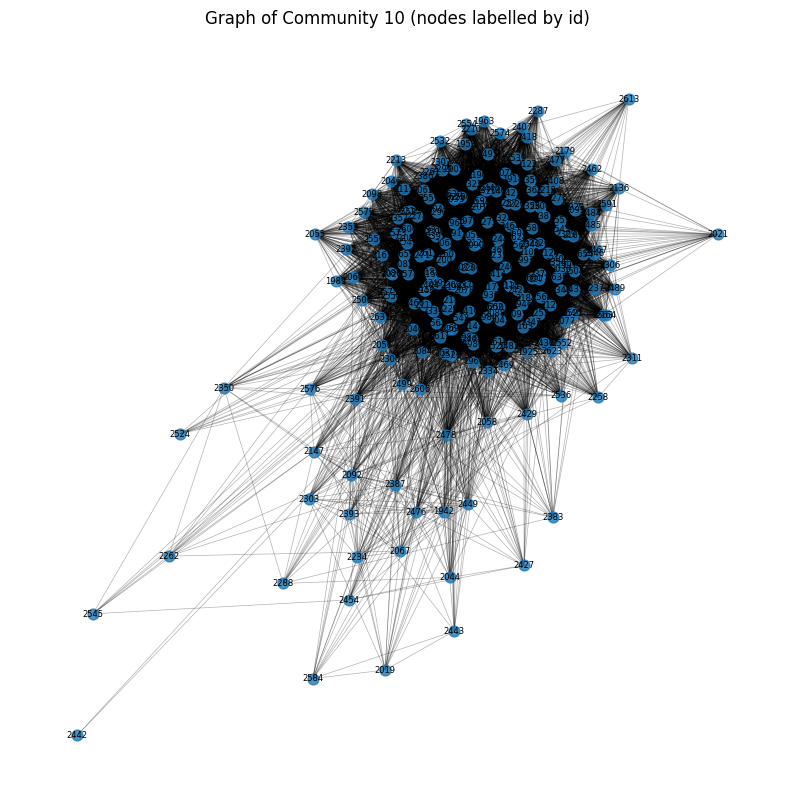

Saved figure: community_10_graph.png


<Figure size 640x480 with 0 Axes>

In [16]:
plot_comm = 10

# Group nodes by community from the 'partition' dictionary
members = {}
for node, comm_id in partition.items():
    if comm_id not in members:
        members[comm_id] = []
    members[comm_id].append(node)

if plot_comm not in members:
    print(f"\nCommunity {plot_comm} tidak ditemukan (max community id: {max(members.keys())})")
else:
    nodes_comm = members[plot_comm]
    H = G.subgraph(nodes_comm).copy()
    print(f"\nCommunity {plot_comm} -> nodes: {len(H.nodes())}, edges: {len(H.edges())}")

    # plot (size dan layout)
    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(H, seed=42)
    nx.draw_networkx_nodes(H, pos, node_size=60, node_color='tab:blue', alpha=0.8)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    nx.draw_networkx_labels(H, pos, font_size=6)    # show node ids
    plt.title(f"Graph of Community {plot_comm} (nodes labelled by id)")
    plt.axis('off')
    plt.show()

    # Simpan gambar
    plt.savefig(f"community_{plot_comm}_graph.png", dpi=300, bbox_inches='tight')
    print(f"Saved figure: community_{plot_comm}_graph.png")